<a href="https://colab.research.google.com/github/maaniaxs/Deep-Learning/blob/main/mnist_CNN_DT_28_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.__version__

'2.9.2'

# MNIST
This example is using MNIST handwritten digits. the dataset contain 60000 examples for trainings and 10000 for testing . 
The digits have been size-normalized and centered in a fixed size image 28*28 pixel and value from 0 to 1

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import utils
from keras.utils import np_utils
import keras
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
print(y_train.shape)
y_train[0:10]

(60000,)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

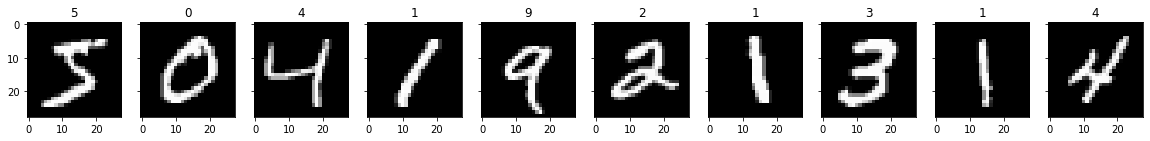

In [6]:
#
fig, axis = plt.subplots(ncols= 10, sharex=False, sharey=True, figsize=(20,4))
for i in range(10):
  axis[i].set_title(y_train[i])
  axis[i].imshow(x_train[i], cmap='gray')
  #axis[i].get_xaxis().set_visible(False)
  #axis[i].get_yaxis().set_visible(False)
plt.show()

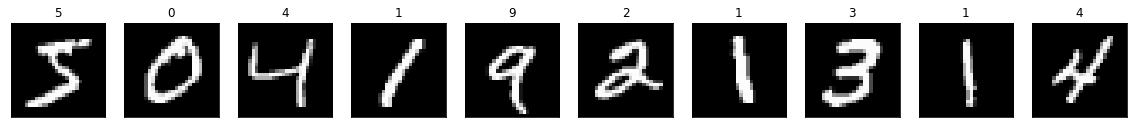

In [7]:
fig, axis = plt.subplots(ncols= 10, sharex=False, sharey=True, figsize=(20,4))
for i in range(10):
  axis[i].set_title(y_train[i])
  axis[i].imshow(x_train[i], cmap='gray')
  axis[i].get_xaxis().set_visible(False)
  axis[i].get_yaxis().set_visible(False)
plt.show()

In [8]:
a = np.arange(12).reshape(3,2,2)
print(a)
print(a.shape[0])
print(a.shape[1])
print(a.shape[2])


[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
3
2
2


In [9]:
#
print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])

60000
28
28


In [10]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# For example we trying
#b = np.arange(1568).reshape(2,28,28)
#b
#b.reshape(b.shape[0], 28,28,1)

In [12]:
x_train = x_train.astype('float32') # float16
x_test = x_test.astype('float32')

x_train /=255
x_test /=255

Y_train = utils.np_utils.to_categorical(y_train, 10)
Y_test = utils.np_utils.to_categorical(y_test, 10)
#
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 693,578
Trainable params: 693,578
Non-trainable params: 0
__________________________________________________

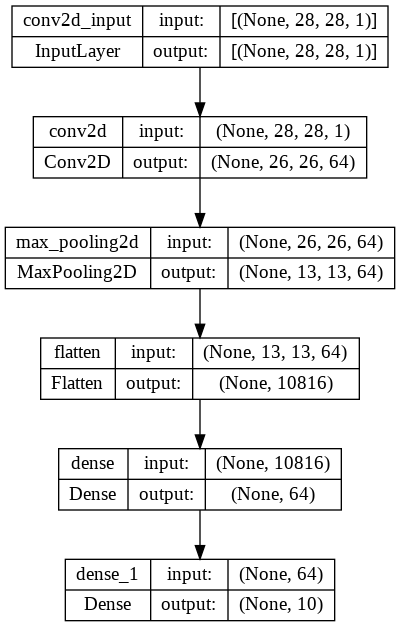

In [24]:
utils.plot_model(model, show_shapes=True)

In [14]:
# compile model
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
# model fit
model.fit(x_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test,Y_test))


Epoch 1/10
469/469 [==============================] - 11s 6ms/step - loss: 0.1722 - accuracy: 0.9477 - val_loss: 0.0851 - val_accuracy: 0.9740
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0607 - val_accuracy: 0.9808
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0477 - val_accuracy: 0.9836
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0514 - val_accuracy: 0.9844
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0164 - accuracy: 0.9952 - val_loss: 0.0573 - val_accuracy: 0.9825
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.0499 - val_accuracy: 0.9852
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0523 - val_accuracy: 0.9848
Ep

In [15]:
# SAVE THE MODEL
model.save('mnist_model.h5')

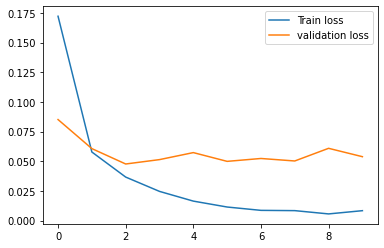

In [17]:
plt.plot(model.history.history['loss'], label='Train loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()

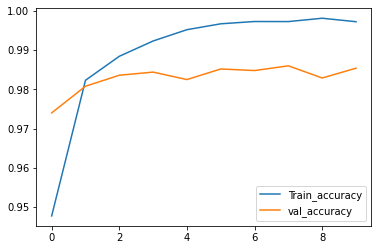

In [18]:
plt.plot(model.history.history['accuracy'], label='Train_accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [20]:
# Load the model
model_m = keras.models.load_model('mnist_model.h5')

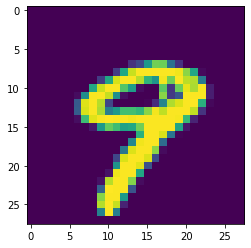

In [36]:
plt.imshow(x_test[9].reshape(28,28))

In [37]:
Y_test[9]  # Right prediction 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [41]:
model_m.predict(x_test[9].reshape(1,28,28,1))

1/1 [==============================] - 0s 16ms/step


array([[1.9174617e-13, 1.4521744e-12, 8.9276538e-12, 6.1450572e-10,
        2.6673508e-06, 9.2013686e-09, 1.9707566e-15, 2.3758428e-05,
        3.0597602e-10, 9.9997354e-01]], dtype=float32)

In [40]:
# predict 
# pred = model_m.predict(x_test[9].reshape(1,28,28,1))
# np.argmax(pred)  # Right prediction
print('Model predcted value=',np.argmax(model_m.predict(x_test[9].reshape(1,28,28,1))))

1/1 [==============================] - 0s 19ms/step
Model predcted value= 9
